In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222666, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222665, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635,-25.512787
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663,-25.512695
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670,-25.512691
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723,-25.512629
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717,-25.512697


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32462  1.32466         1.32465    17    2   
2020-01-01 17:05:00  1.32465  1.32462  1.32473         1.32469    17    2   
2020-01-01 17:10:00  1.32464  1.32459  1.32476         1.32480    17    2   
2020-01-01 17:15:00  1.32469  1.32459  1.32481         1.32466    17    2   
2020-01-01 17:20:00  1.32482  1.32457  1.32482         1.32512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000   1.324640  0.00004    1.324635 -25.512787  
2020-01-01 17:05:00     1   0.00000   1.324675  0.00011    1.324663 -25.512695  
2020-01-01 17:10:00     1  -0.00005   1.324675  0.00017    1.324670 -25.512691  
2020-01-01 17:15:00     1  -0.00011   1.324700  0.00022

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178132
178132
22000
22000
22533
22533


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178132, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178107, 24, 12)
(21975, 24, 12)
(22508, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178107, 1)
(21975, 1)
(22508, 1)


array([[0.6475849 ],
       [0.6488571 ],
       [0.64790297],
       ...,
       [0.39517307],
       [0.3953848 ],
       [0.39648008]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6475849 , 0.6488571 , 0.64790297, ..., 0.39517307, 0.3953848 ,
       0.39648008], dtype=float32)

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD5_LSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 300.9809 - mae: 3.7750 - mse: 300.9809 - root_mean_squared_error: 17.3488 - mape: 16380.5488
Epoch 1: val_mse improved from inf to 0.06947, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 305s 646ms/step - loss: 300.9809 - mae: 3.7750 - mse: 300.9809 - root_mean_squared_error: 17.3488 - mape: 16380.5488 - val_loss: 0.0695 - val_mae: 0.2180 - val_mse: 0.0695 - val_root_mean_squared_error: 0.2636 - val_mape: 31144.8809
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0493 - mae: 0.1804 - mse: 0.0493 - root_mean_squared_error: 0.2221 - mape: 3433.7188
Epoch 2: val_mse improved from 0.06947 to 0.05560, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 303s 655ms/step - loss: 0.0493 - mae: 0.1804 - mse: 0.0493 - root_mean_squared_error: 0.2221 - mape: 3433.7188 - val_loss: 0.0556 - val_mae: 0.1881 - val_mse: 0.0556 - val_root_mean_squared_error: 0.2358 - val_mape: 27583.3438
Epoch 3/60
463/463 [==============================] - ETA: 0s - loss: 0.0480 - mae: 0.1798 - mse: 0.0480 - root_mean_squared_error: 0.2191 - mape: 3448.2837
Epoch 3: val_mse improved from 0.05560 to 0.05545, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 309s 667ms/step - loss: 0.0480 - mae: 0.1798 - mse: 0.0480 - root_mean_squared_error: 0.2191 - mape: 3448.2837 - val_loss: 0.0555 - val_mae: 0.1877 - val_mse: 0.0555 - val_root_mean_squared_error: 0.2355 - val_mape: 27514.6348
Epoch 4/60
463/463 [==============================] - ETA: 0s - loss: 0.0479 - mae: 0.1797 - mse: 0.0479 - root_mean_squared_error: 0.2187 - mape: 3900.2026
Epoch 4: val_mse did not improve from 0.05545
463/463 [==============================] - 298s 643ms/step - loss: 0.0479 - mae: 0.1797 - mse: 0.0479 - root_mean_squared_error: 0.2187 - mape: 3900.2026 - val_loss: 0.0555 - val_mae: 0.1878 - val_mse: 0.0555 - val_root_mean_squared_error: 0.2356 - val_mape: 27541.2754
Epoch 5/60
463/463 [==============================] - ETA: 0s - loss: 0.0476 - mae: 0.1793 - mse: 0.0476 - root_mean_squared_error: 0.2181 - mape: 4874.9888
Epoch 5: val_mse improved from 0.05545 to 0.05533, saving model to /content/drive/MyDrive/modelweigh

463/463 [==============================] - 306s 660ms/step - loss: 0.0476 - mae: 0.1793 - mse: 0.0476 - root_mean_squared_error: 0.2181 - mape: 4874.9888 - val_loss: 0.0553 - val_mae: 0.1874 - val_mse: 0.0553 - val_root_mean_squared_error: 0.2352 - val_mape: 27458.5078
Epoch 6/60
463/463 [==============================] - ETA: 0s - loss: 0.0473 - mae: 0.1786 - mse: 0.0473 - root_mean_squared_error: 0.2176 - mape: 3975.3879
Epoch 6: val_mse did not improve from 0.05533
463/463 [==============================] - 299s 646ms/step - loss: 0.0473 - mae: 0.1786 - mse: 0.0473 - root_mean_squared_error: 0.2176 - mape: 3975.3879 - val_loss: 0.0555 - val_mae: 0.1879 - val_mse: 0.0555 - val_root_mean_squared_error: 0.2356 - val_mape: 27550.4746
Epoch 7/60
463/463 [==============================] - ETA: 0s - loss: 0.0471 - mae: 0.1785 - mse: 0.0471 - root_mean_squared_error: 0.2171 - mape: 3532.3384
Epoch 7: val_mse did not improve from 0.05533
463/463 [==============================] - 303s 654ms/

463/463 [==============================] - 315s 681ms/step - loss: 0.0418 - mae: 0.1684 - mse: 0.0418 - root_mean_squared_error: 0.2045 - mape: 3850.1226 - val_loss: 0.0525 - val_mae: 0.1821 - val_mse: 0.0525 - val_root_mean_squared_error: 0.2291 - val_mape: 27462.2383
Epoch 15/60
463/463 [==============================] - ETA: 0s - loss: 0.0365 - mae: 0.1560 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 3273.3823
Epoch 15: val_mse improved from 0.05246 to 0.04374, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 303s 656ms/step - loss: 0.0365 - mae: 0.1560 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 3273.3823 - val_loss: 0.0437 - val_mae: 0.1626 - val_mse: 0.0437 - val_root_mean_squared_error: 0.2091 - val_mape: 26346.3398
Epoch 16/60
463/463 [==============================] - ETA: 0s - loss: 0.0253 - mae: 0.1251 - mse: 0.0253 - root_mean_squared_error: 0.1589 - mape: 2812.1660
Epoch 16: val_mse improved from 0.04374 to 0.02654, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 297s 643ms/step - loss: 0.0253 - mae: 0.1251 - mse: 0.0253 - root_mean_squared_error: 0.1589 - mape: 2812.1660 - val_loss: 0.0265 - val_mae: 0.1194 - val_mse: 0.0265 - val_root_mean_squared_error: 0.1629 - val_mape: 22904.0234
Epoch 17/60
463/463 [==============================] - ETA: 0s - loss: 0.0159 - mae: 0.0977 - mse: 0.0159 - root_mean_squared_error: 0.1262 - mape: 2266.7288
Epoch 17: val_mse improved from 0.02654 to 0.01616, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 309s 668ms/step - loss: 0.0159 - mae: 0.0977 - mse: 0.0159 - root_mean_squared_error: 0.1262 - mape: 2266.7288 - val_loss: 0.0162 - val_mae: 0.0978 - val_mse: 0.0162 - val_root_mean_squared_error: 0.1271 - val_mape: 18998.5527
Epoch 18/60
463/463 [==============================] - ETA: 0s - loss: 0.0103 - mae: 0.0773 - mse: 0.0103 - root_mean_squared_error: 0.1015 - mape: 1922.0392
Epoch 18: val_mse improved from 0.01616 to 0.01068, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 317s 686ms/step - loss: 0.0103 - mae: 0.0773 - mse: 0.0103 - root_mean_squared_error: 0.1015 - mape: 1922.0392 - val_loss: 0.0107 - val_mae: 0.0830 - val_mse: 0.0107 - val_root_mean_squared_error: 0.1033 - val_mape: 16070.2148
Epoch 19/60
463/463 [==============================] - ETA: 0s - loss: 0.0073 - mae: 0.0649 - mse: 0.0073 - root_mean_squared_error: 0.0853 - mape: 1654.7122
Epoch 19: val_mse improved from 0.01068 to 0.00788, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 310s 670ms/step - loss: 0.0073 - mae: 0.0649 - mse: 0.0073 - root_mean_squared_error: 0.0853 - mape: 1654.7122 - val_loss: 0.0079 - val_mae: 0.0721 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0888 - val_mape: 14300.6621
Epoch 20/60
463/463 [==============================] - ETA: 0s - loss: 0.0053 - mae: 0.0556 - mse: 0.0053 - root_mean_squared_error: 0.0730 - mape: 1776.1636
Epoch 20: val_mse improved from 0.00788 to 0.00443, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 311s 671ms/step - loss: 0.0053 - mae: 0.0556 - mse: 0.0053 - root_mean_squared_error: 0.0730 - mape: 1776.1636 - val_loss: 0.0044 - val_mae: 0.0459 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0665 - val_mape: 13000.0977
Epoch 21/60
463/463 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0481 - mse: 0.0040 - root_mean_squared_error: 0.0631 - mape: 1702.9258
Epoch 21: val_mse improved from 0.00443 to 0.00374, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 318s 687ms/step - loss: 0.0040 - mae: 0.0481 - mse: 0.0040 - root_mean_squared_error: 0.0631 - mape: 1702.9258 - val_loss: 0.0037 - val_mae: 0.0441 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0612 - val_mape: 11821.4658
Epoch 22/60
463/463 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0413 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 1335.7351
Epoch 22: val_mse improved from 0.00374 to 0.00338, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 311s 671ms/step - loss: 0.0029 - mae: 0.0413 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 1335.7351 - val_loss: 0.0034 - val_mae: 0.0458 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0582 - val_mape: 10873.1816
Epoch 23/60
463/463 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0362 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 1202.2135
Epoch 23: val_mse improved from 0.00338 to 0.00208, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 331s 714ms/step - loss: 0.0022 - mae: 0.0362 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 1202.2135 - val_loss: 0.0021 - val_mae: 0.0299 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 10266.0664
Epoch 24/60
463/463 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1433.7434
Epoch 24: val_mse improved from 0.00208 to 0.00171, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 331s 716ms/step - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1433.7434 - val_loss: 0.0017 - val_mae: 0.0269 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0413 - val_mape: 9564.2783
Epoch 25/60
463/463 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0290 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1144.1676
Epoch 25: val_mse did not improve from 0.00171
463/463 [==============================] - 322s 696ms/step - loss: 0.0015 - mae: 0.0290 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1144.1676 - val_loss: 0.0023 - val_mae: 0.0391 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0478 - val_mape: 9079.1387
Epoch 26/60
463/463 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 1083.8351
Epoch 26: val_mse did not improve from 0.00171
463/463 [==============================] - 319s 688m

463/463 [==============================] - 336s 726ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 1466.9955 - val_loss: 0.0015 - val_mae: 0.0303 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 8299.9482
Epoch 28/60
463/463 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0240 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1211.6624
Epoch 28: val_mse did not improve from 0.00155
463/463 [==============================] - 307s 663ms/step - loss: 0.0010 - mae: 0.0240 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1211.6624 - val_loss: 0.0015 - val_mae: 0.0321 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0394 - val_mape: 7906.6309
Epoch 29/60
463/463 [==============================] - ETA: 0s - loss: 8.9577e-04 - mae: 0.0227 - mse: 8.9577e-04 - root_mean_squared_error: 0.0299 - mape: 910.9525
Epoch 29: val_mse improved from 0.00155 to 0.00147, saving model to /content/drive/MyDrive/m

463/463 [==============================] - 319s 690ms/step - loss: 8.9577e-04 - mae: 0.0227 - mse: 8.9577e-04 - root_mean_squared_error: 0.0299 - mape: 910.9525 - val_loss: 0.0015 - val_mae: 0.0310 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 7528.2661
Epoch 30/60
463/463 [==============================] - ETA: 0s - loss: 8.2006e-04 - mae: 0.0218 - mse: 8.2006e-04 - root_mean_squared_error: 0.0286 - mape: 1023.6708
Epoch 30: val_mse improved from 0.00147 to 0.00112, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 331s 716ms/step - loss: 8.2006e-04 - mae: 0.0218 - mse: 8.2006e-04 - root_mean_squared_error: 0.0286 - mape: 1023.6708 - val_loss: 0.0011 - val_mae: 0.0267 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 7213.0386
Epoch 31/60
463/463 [==============================] - ETA: 0s - loss: 6.9358e-04 - mae: 0.0199 - mse: 6.9358e-04 - root_mean_squared_error: 0.0263 - mape: 807.0272
Epoch 31: val_mse did not improve from 0.00112
463/463 [==============================] - 312s 672ms/step - loss: 6.9358e-04 - mae: 0.0199 - mse: 6.9358e-04 - root_mean_squared_error: 0.0263 - mape: 807.0272 - val_loss: 0.0014 - val_mae: 0.0327 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 6769.2314
Epoch 32/60
463/463 [==============================] - ETA: 0s - loss: 6.4552e-04 - mae: 0.0194 - mse: 6.4552e-04 - root_mean_squared_error: 0.0254 - mape: 768.9498
Epoch 32: val_mse improved from 0.00112 to 0.00102, saving model to /c

463/463 [==============================] - 327s 706ms/step - loss: 6.4552e-04 - mae: 0.0194 - mse: 6.4552e-04 - root_mean_squared_error: 0.0254 - mape: 768.9498 - val_loss: 0.0010 - val_mae: 0.0264 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 6377.0908
Epoch 33/60
463/463 [==============================] - ETA: 0s - loss: 5.8118e-04 - mae: 0.0184 - mse: 5.8118e-04 - root_mean_squared_error: 0.0241 - mape: 766.4706
Epoch 33: val_mse improved from 0.00102 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 334s 721ms/step - loss: 5.8118e-04 - mae: 0.0184 - mse: 5.8118e-04 - root_mean_squared_error: 0.0241 - mape: 766.4706 - val_loss: 5.3603e-04 - val_mae: 0.0163 - val_mse: 5.3603e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 6062.2979
Epoch 34/60
463/463 [==============================] - ETA: 0s - loss: 5.3400e-04 - mae: 0.0177 - mse: 5.3400e-04 - root_mean_squared_error: 0.0231 - mape: 748.7935
Epoch 34: val_mse improved from 0.00054 to 0.00049, saving model to /content/drive/MyDrive/modelweights/GBP_USD5_LSTM


463/463 [==============================] - 329s 710ms/step - loss: 5.3400e-04 - mae: 0.0177 - mse: 5.3400e-04 - root_mean_squared_error: 0.0231 - mape: 748.7935 - val_loss: 4.8900e-04 - val_mae: 0.0158 - val_mse: 4.8900e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 5710.8530
Epoch 35/60
463/463 [==============================] - ETA: 0s - loss: 4.6358e-04 - mae: 0.0165 - mse: 4.6358e-04 - root_mean_squared_error: 0.0215 - mape: 735.1888
Epoch 35: val_mse did not improve from 0.00049
463/463 [==============================] - 309s 667ms/step - loss: 4.6358e-04 - mae: 0.0165 - mse: 4.6358e-04 - root_mean_squared_error: 0.0215 - mape: 735.1888 - val_loss: 0.0015 - val_mae: 0.0348 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 5353.8276
Epoch 36/60
463/463 [==============================] - ETA: 0s - loss: 4.3320e-04 - mae: 0.0160 - mse: 4.3320e-04 - root_mean_squared_error: 0.0208 - mape: 846.0626
Epoch 36: val_mse did not improve from 0.00049
463/463 [=======

463/463 [==============================] - 318s 688ms/step - loss: 3.7211e-04 - mae: 0.0148 - mse: 3.7211e-04 - root_mean_squared_error: 0.0193 - mape: 614.3741 - val_loss: 3.9113e-04 - val_mae: 0.0145 - val_mse: 3.9113e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 4683.3745
Epoch 38/60
463/463 [==============================] - ETA: 0s - loss: 3.6504e-04 - mae: 0.0148 - mse: 3.6504e-04 - root_mean_squared_error: 0.0191 - mape: 618.8166
Epoch 38: val_mse did not improve from 0.00039
463/463 [==============================] - 308s 666ms/step - loss: 3.6504e-04 - mae: 0.0148 - mse: 3.6504e-04 - root_mean_squared_error: 0.0191 - mape: 618.8166 - val_loss: 0.0013 - val_mae: 0.0324 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 4330.1455
Epoch 39/60
463/463 [==============================] - ETA: 0s - loss: 3.3024e-04 - mae: 0.0141 - mse: 3.3024e-04 - root_mean_squared_error: 0.0182 - mape: 602.5068
Epoch 39: val_mse did not improve from 0.00039
463/463 [=======

463/463 [==============================] - 320s 691ms/step - loss: 2.5578e-04 - mae: 0.0125 - mse: 2.5578e-04 - root_mean_squared_error: 0.0160 - mape: 380.3487 - val_loss: 3.8640e-04 - val_mae: 0.0150 - val_mse: 3.8640e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3504.6709
Epoch 42/60
463/463 [==============================] - ETA: 0s - loss: 2.2782e-04 - mae: 0.0118 - mse: 2.2782e-04 - root_mean_squared_error: 0.0151 - mape: 368.3151
Epoch 42: val_mse did not improve from 0.00039
463/463 [==============================] - 311s 672ms/step - loss: 2.2782e-04 - mae: 0.0118 - mse: 2.2782e-04 - root_mean_squared_error: 0.0151 - mape: 368.3151 - val_loss: 5.1311e-04 - val_mae: 0.0176 - val_mse: 5.1311e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 3264.5984
Epoch 43/60
463/463 [==============================] - ETA: 0s - loss: 1.9646e-04 - mae: 0.0109 - mse: 1.9646e-04 - root_mean_squared_error: 0.0140 - mape: 373.5956
Epoch 43: val_mse did not improve from 0.00039
463/463 

463/463 [==============================] - 321s 693ms/step - loss: 7.5797e-05 - mae: 0.0068 - mse: 7.5797e-05 - root_mean_squared_error: 0.0087 - mape: 233.8763 - val_loss: 3.7910e-04 - val_mae: 0.0163 - val_mse: 3.7910e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 1926.5479
Epoch 59/60
463/463 [==============================] - ETA: 0s - loss: 7.7205e-05 - mae: 0.0068 - mse: 7.7205e-05 - root_mean_squared_error: 0.0088 - mape: 238.4873
Epoch 59: val_mse did not improve from 0.00038
463/463 [==============================] - 312s 674ms/step - loss: 7.7205e-05 - mae: 0.0068 - mse: 7.7205e-05 - root_mean_squared_error: 0.0088 - mape: 238.4873 - val_loss: 6.1123e-04 - val_mae: 0.0218 - val_mse: 6.1123e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 1918.3840
Epoch 60/60
463/463 [==============================] - ETA: 0s - loss: 6.1079e-05 - mae: 0.0060 - mse: 6.1079e-05 - root_mean_squared_error: 0.0078 - mape: 282.6302
Epoch 60: val_mse did not improve from 0.00038
463/463 

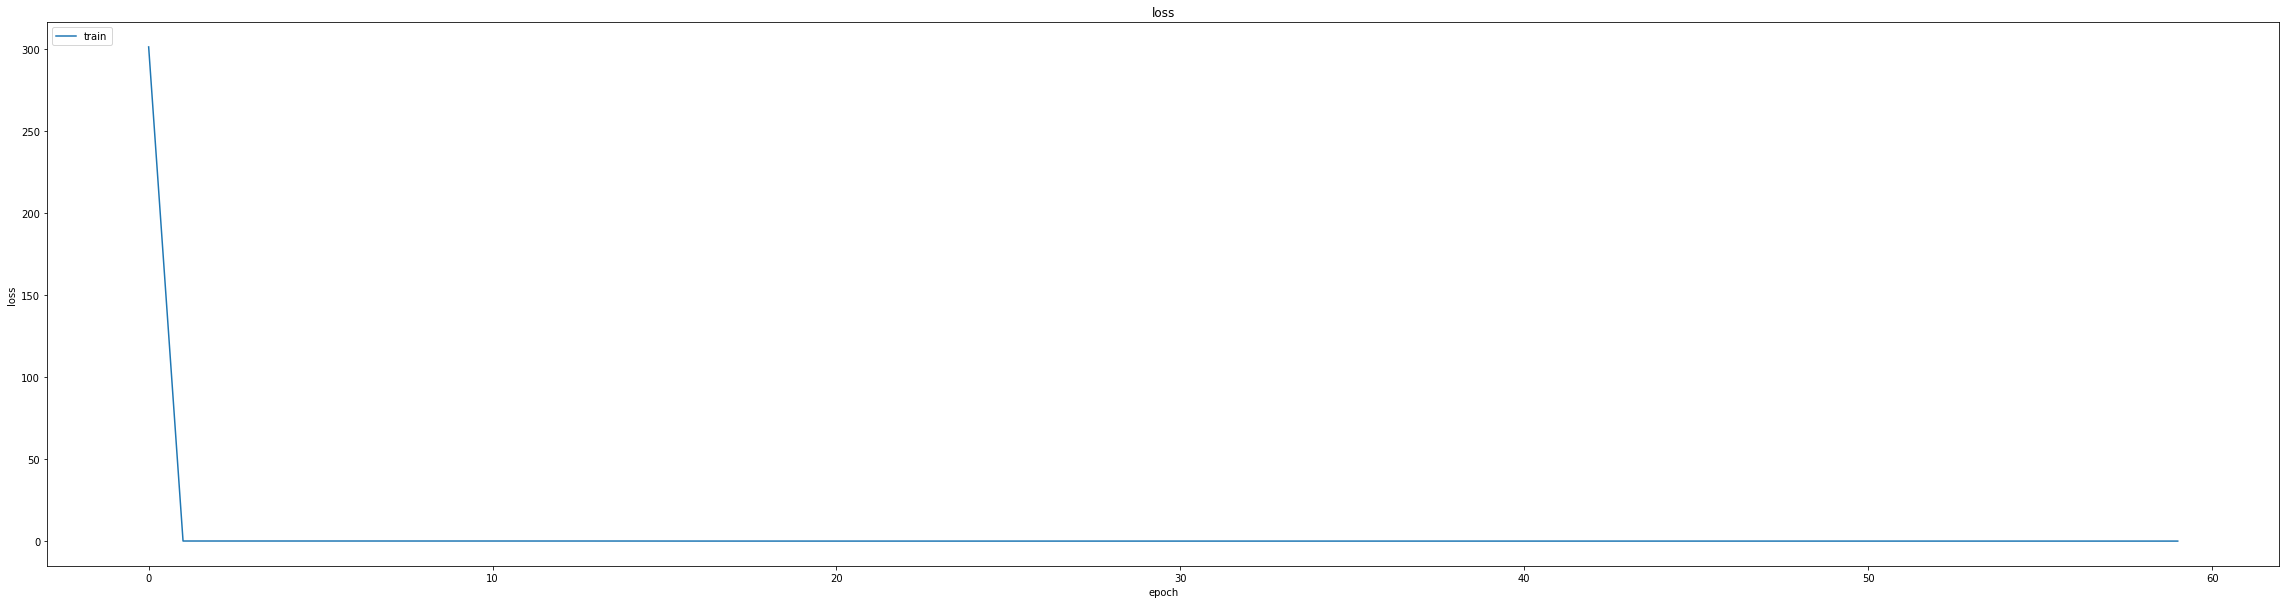

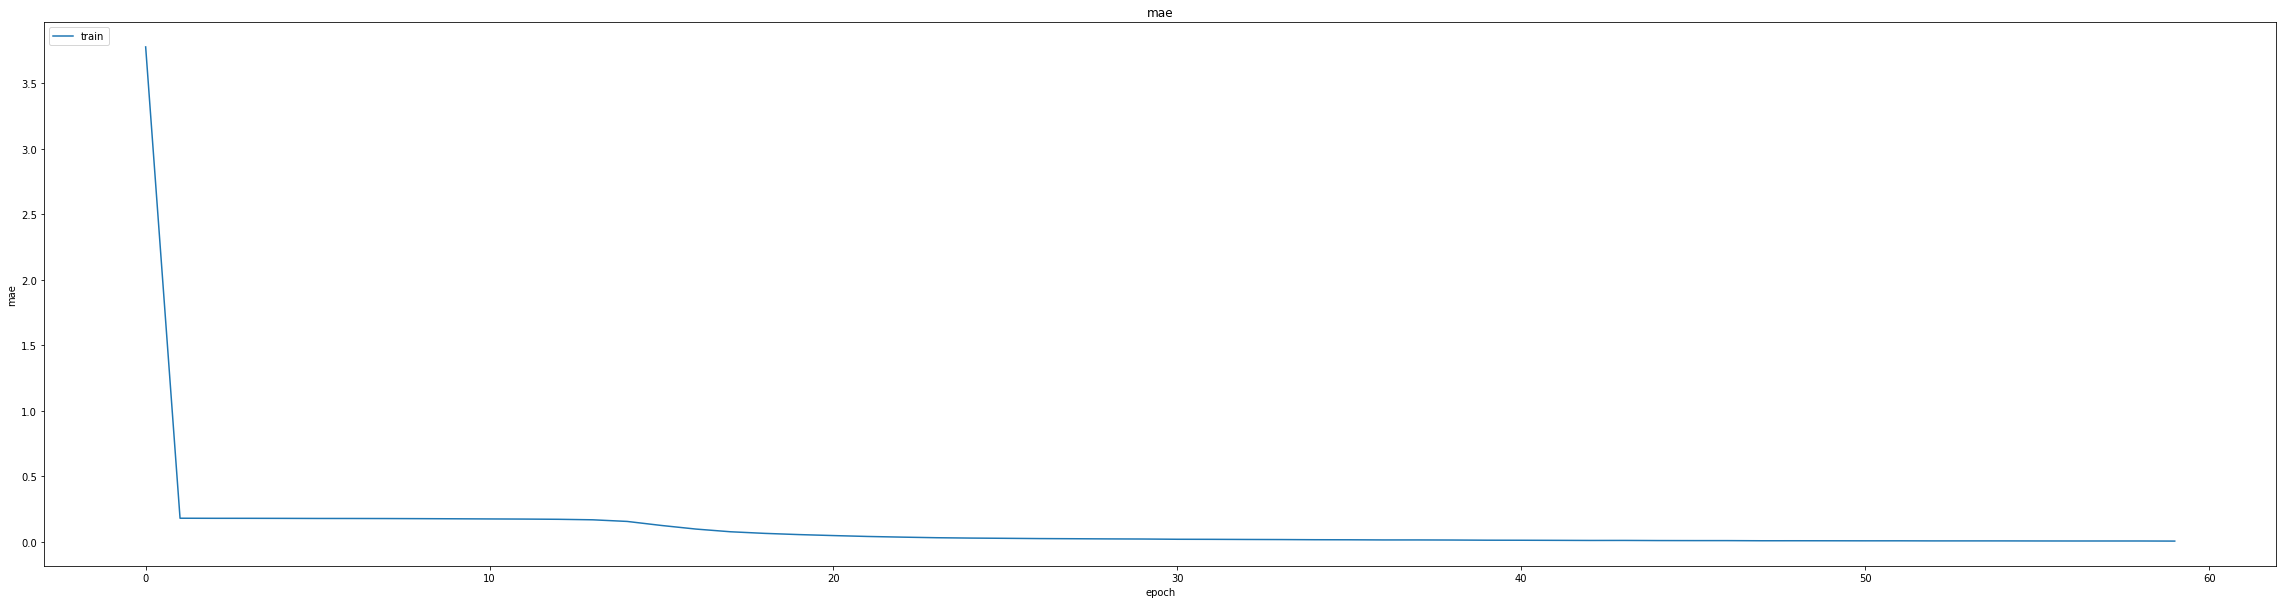

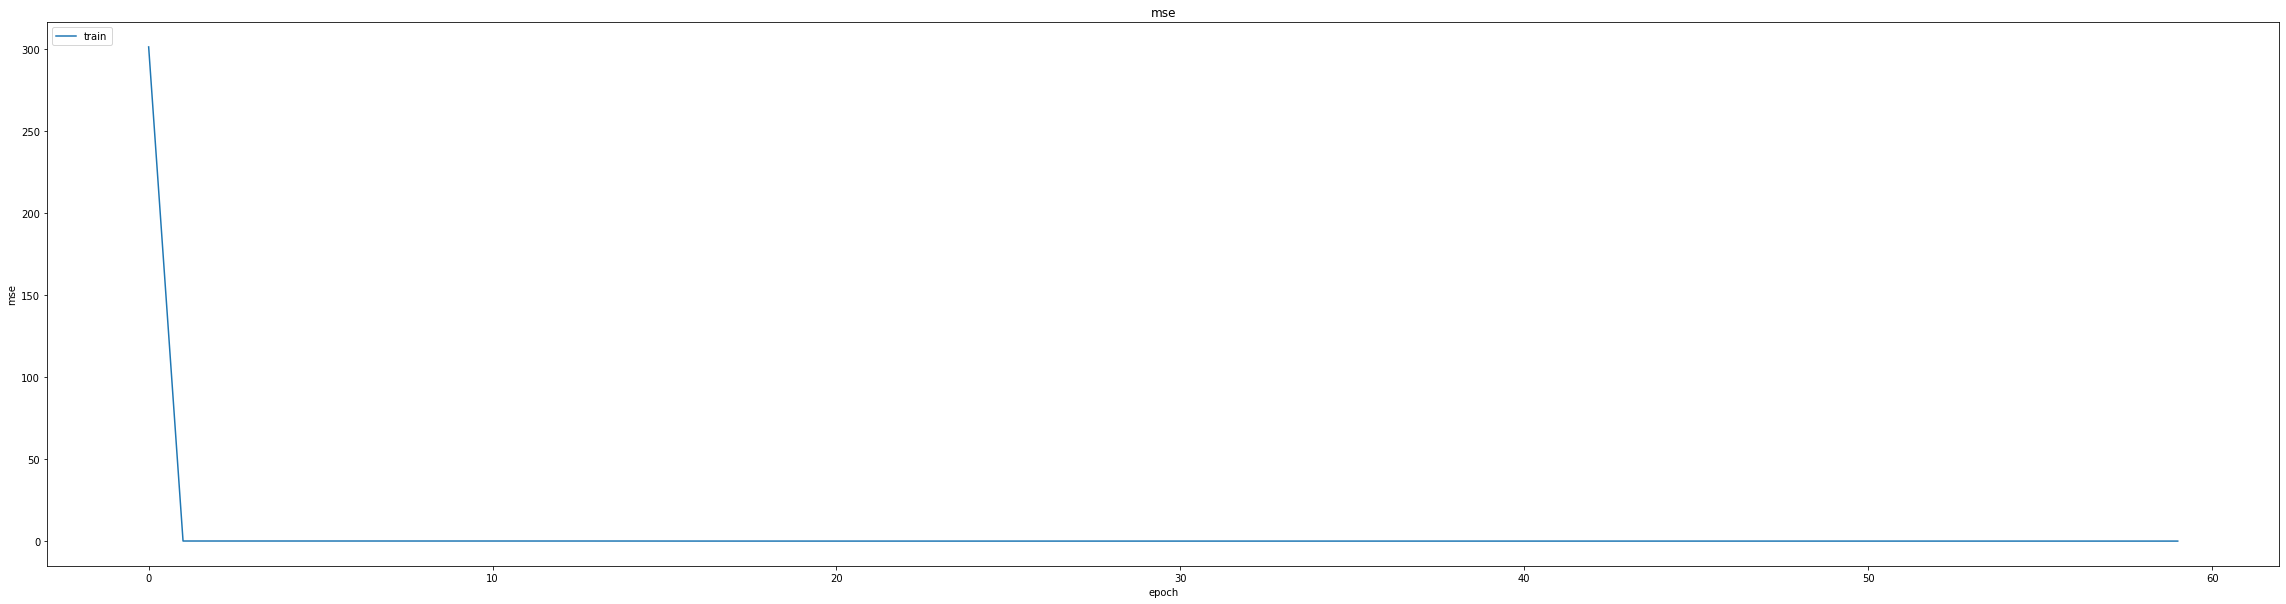

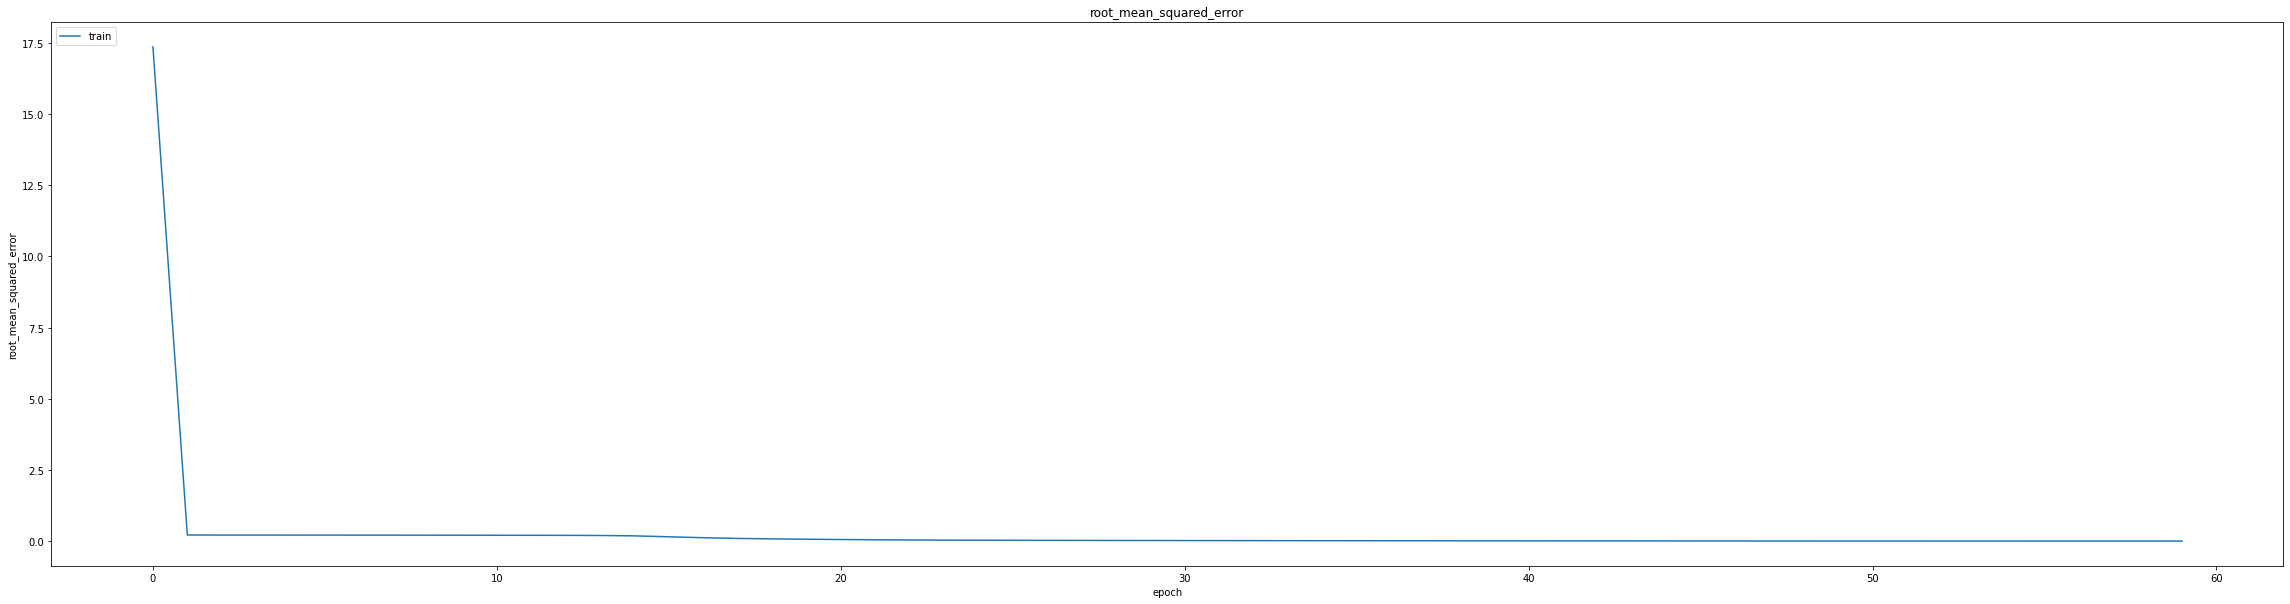

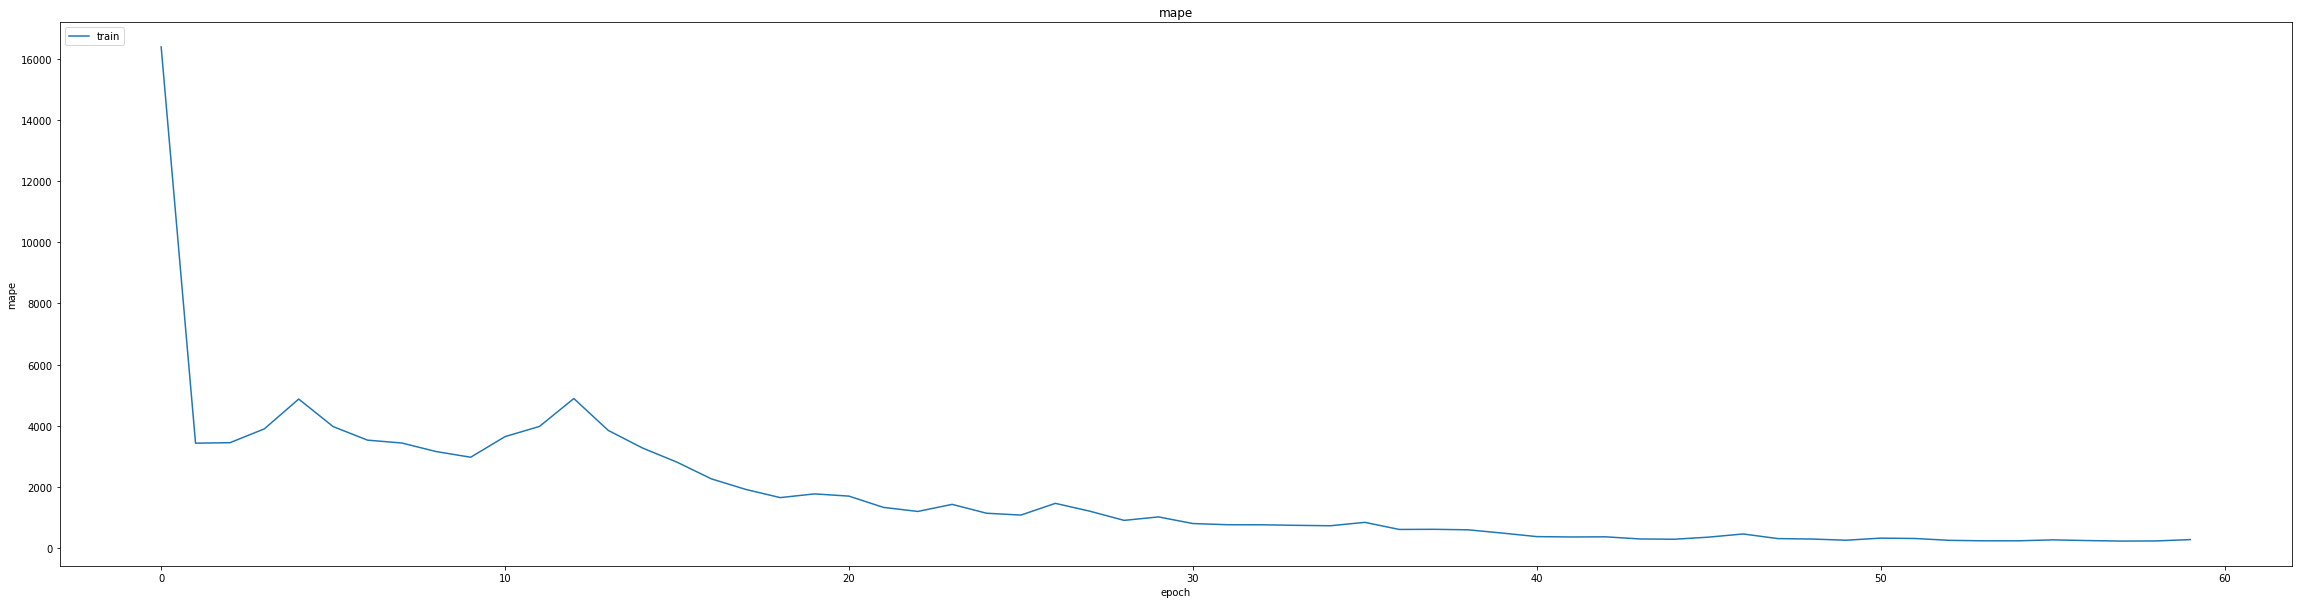

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014530416578054428
0.019470496103167534
687/687 [==============================] - 30s 41ms/step
0.9904115444116832


In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD5_LSTM")

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 3.6258e-04 - mae: 0.0080 - mse: 3.6258e-04 - root_mean_squared_error: 0.0190 - mape: 258.7250
Epoch 1: val_mse did not improve from 0.00038
463/463 [==============================] - 331s 700ms/step - loss: 3.6258e-04 - mae: 0.0080 - mse: 3.6258e-04 - root_mean_squared_error: 0.0190 - mape: 258.7250 - val_loss: 7.7326e-04 - val_mae: 0.0251 - val_mse: 7.7326e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 1865.4236 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 3.6597e-05 - mae: 0.0045 - mse: 3.6597e-05 - root_mean_squared_error: 0.0060 - mape: 220.1612
Epoch 2: val_mse did not improve from 0.00038
463/463 [==============================] - 316s 682ms/step - loss: 3.6597e-05 - mae: 0.0045 - mse: 3.6597e-05 - root_mean_squared_error: 0.0060 - mape: 220.1612 - val_loss: 7.0599e-04 - val_mae: 0.0243 - val_mse: 7.0599e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1742.1854

463/463 [==============================] - 321s 693ms/step - loss: 4.0857e-05 - mae: 0.0050 - mse: 4.0857e-05 - root_mean_squared_error: 0.0064 - mape: 217.0948 - val_loss: 2.6630e-04 - val_mae: 0.0140 - val_mse: 2.6630e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 1503.5051 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
463/463 [==============================] - ETA: 0s - loss: 3.2124e-05 - mae: 0.0043 - mse: 3.2124e-05 - root_mean_squared_error: 0.0057 - mape: 179.0174
Epoch 9: val_mse did not improve from 0.00027
463/463 [==============================] - 309s 666ms/step - loss: 3.2124e-05 - mae: 0.0043 - mse: 3.2124e-05 - root_mean_squared_error: 0.0057 - mape: 179.0174 - val_loss: 7.3781e-04 - val_mae: 0.0256 - val_mse: 7.3781e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 1458.3052 - lr: 6.5610e-04
Epoch 10/20
463/463 [==============================] - ETA: 0s - loss: 3.5324e-05 - mae: 0.0046 - mse: 3.5324e-05 - root_mean_squared_error: 0.0059 - ma

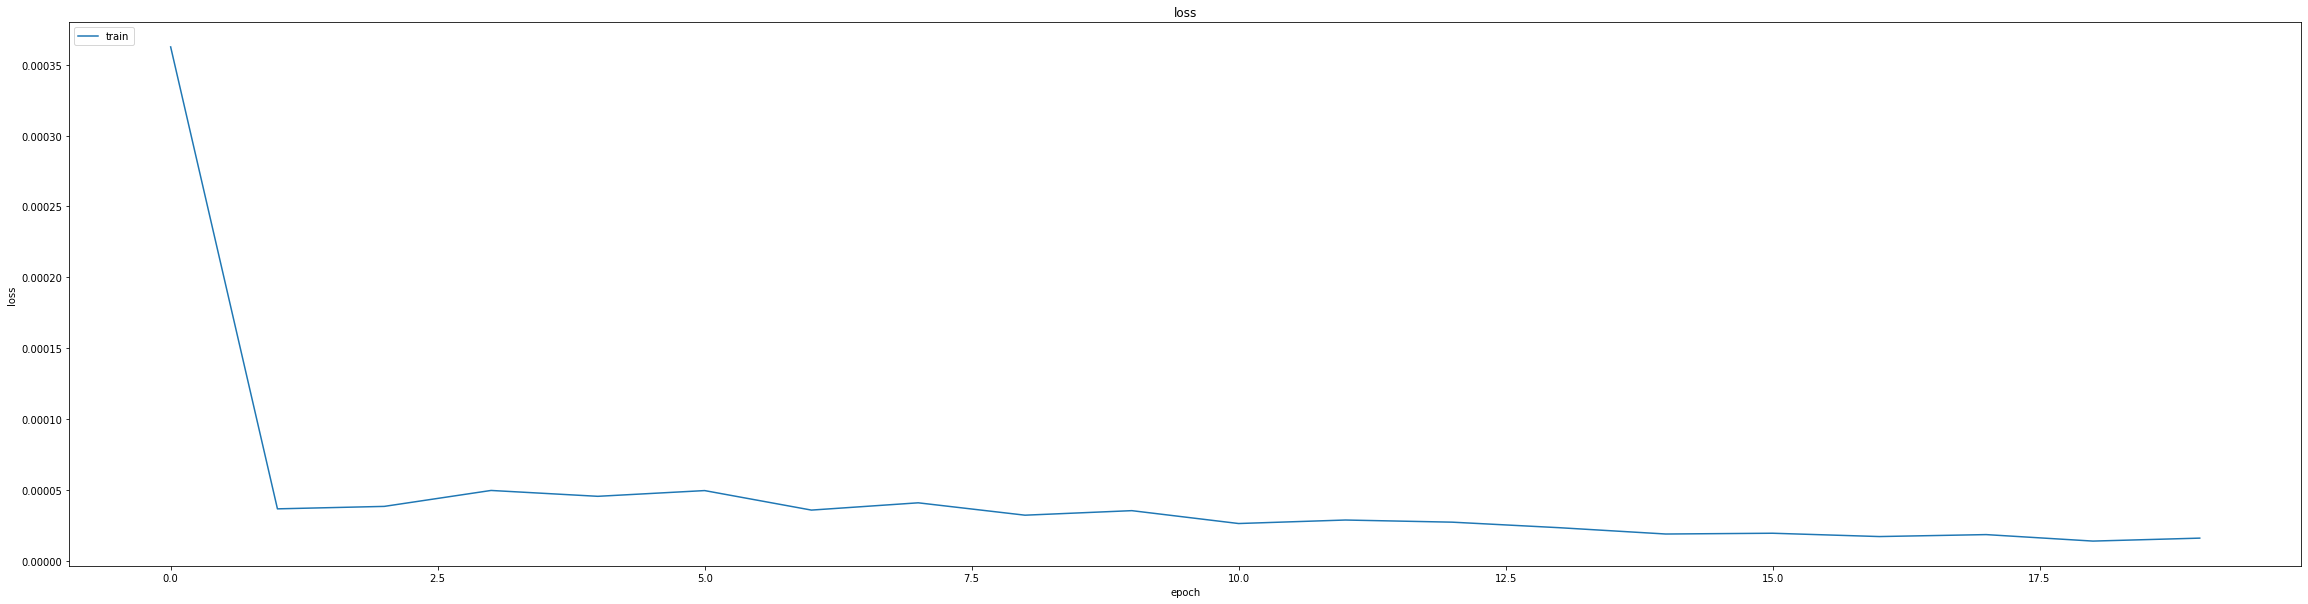

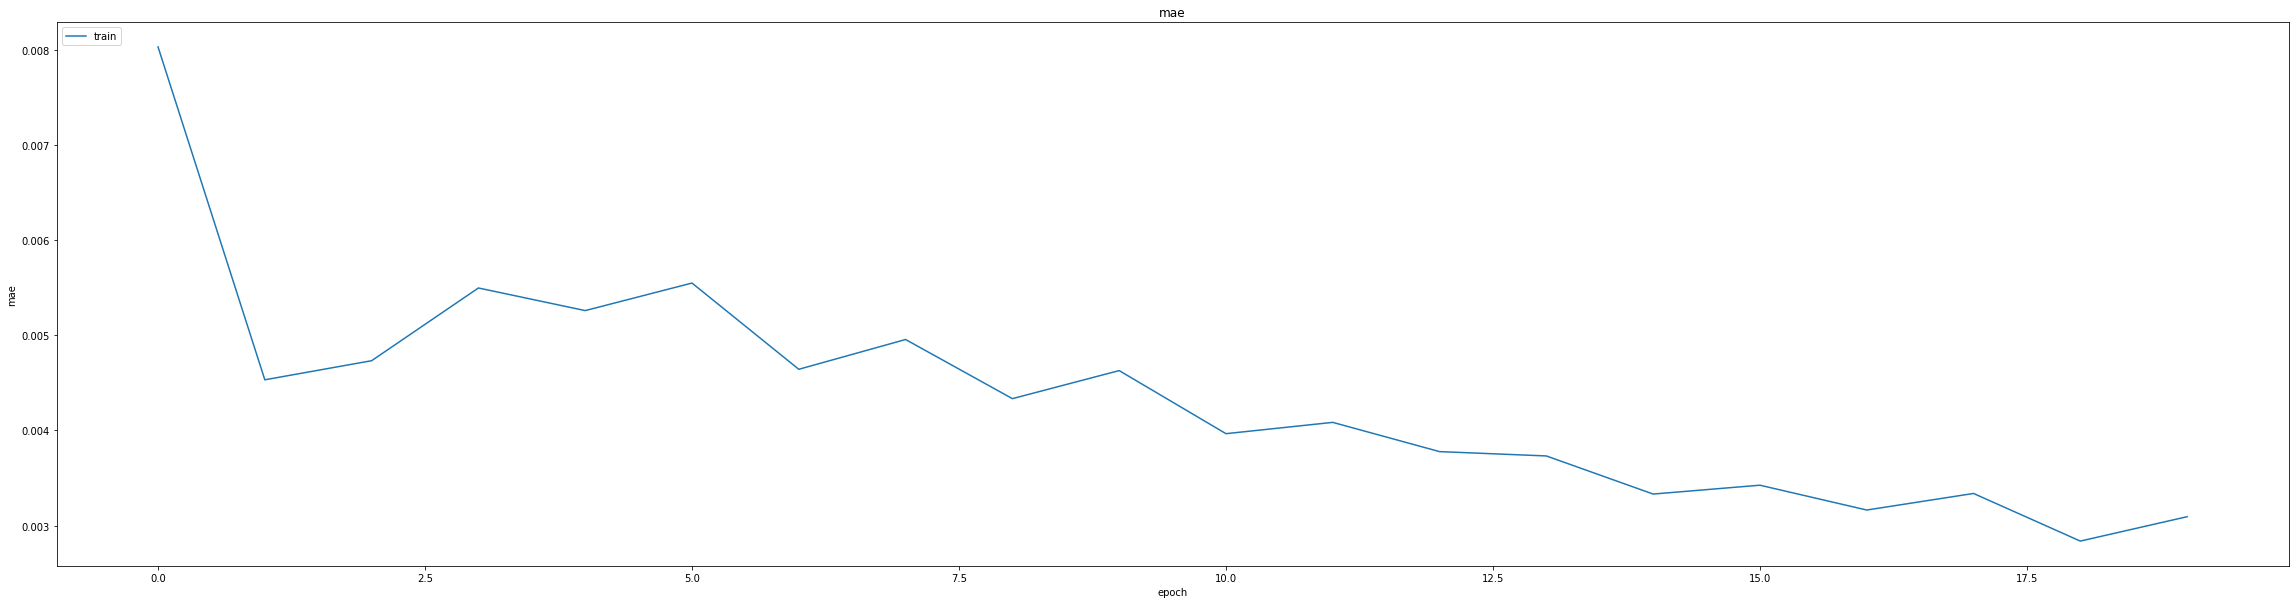

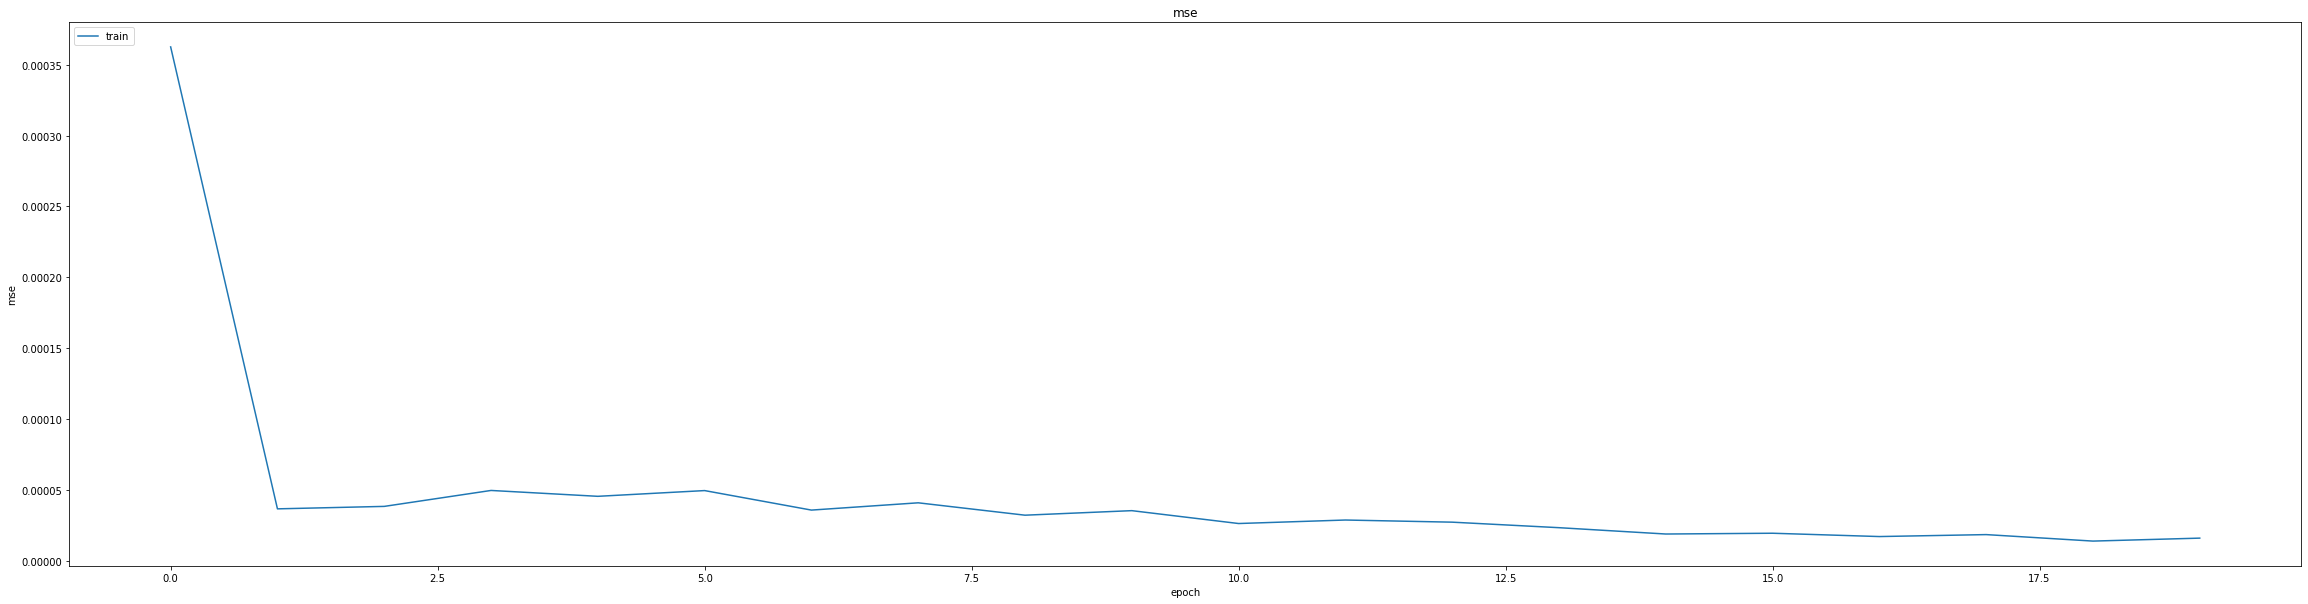

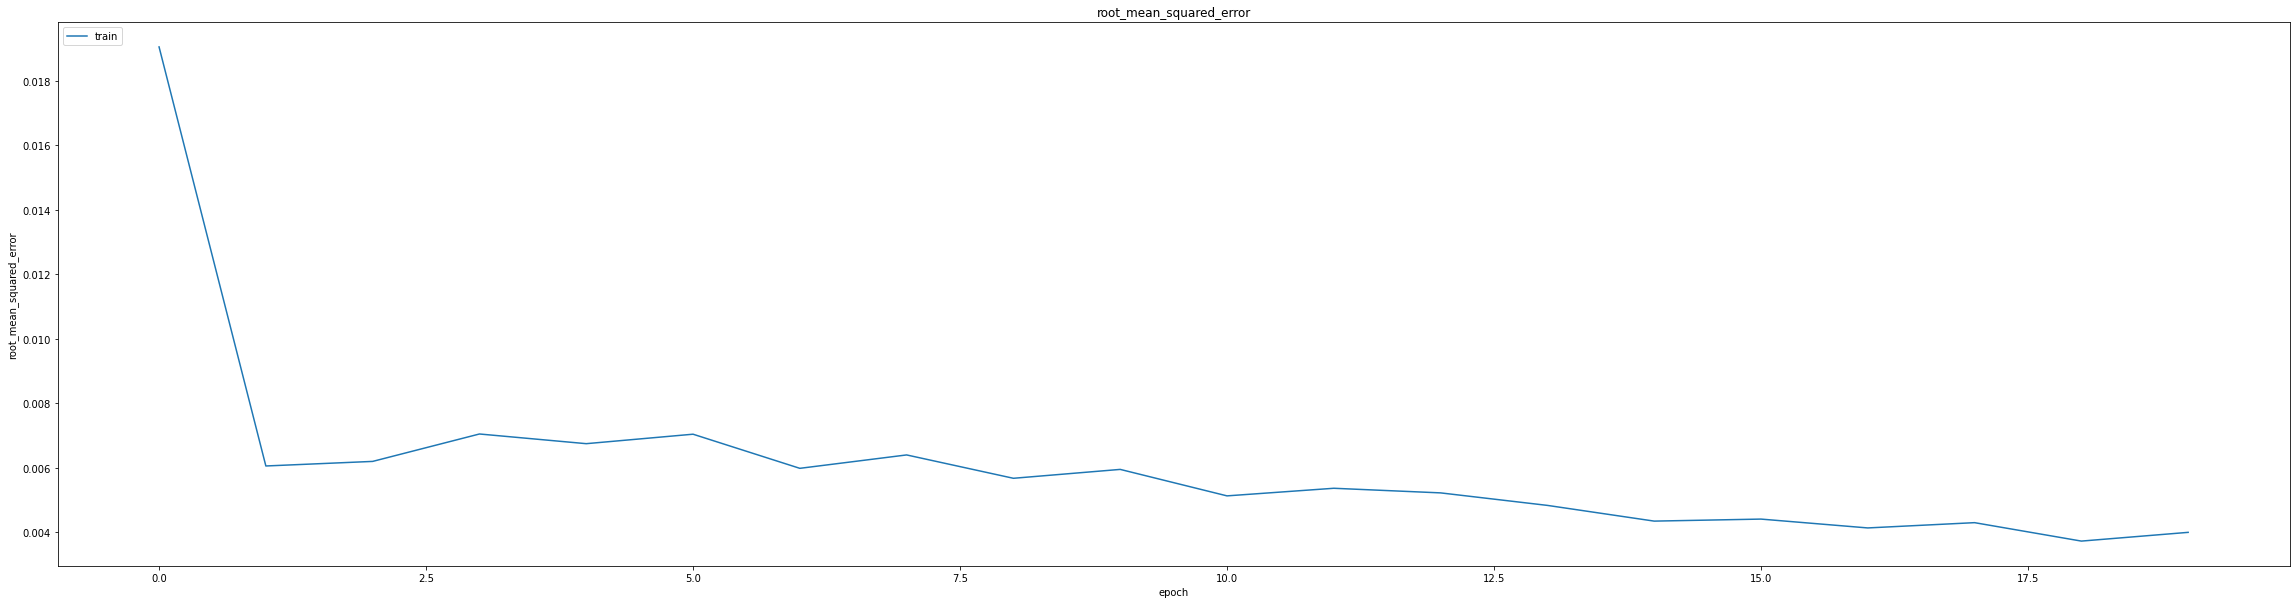

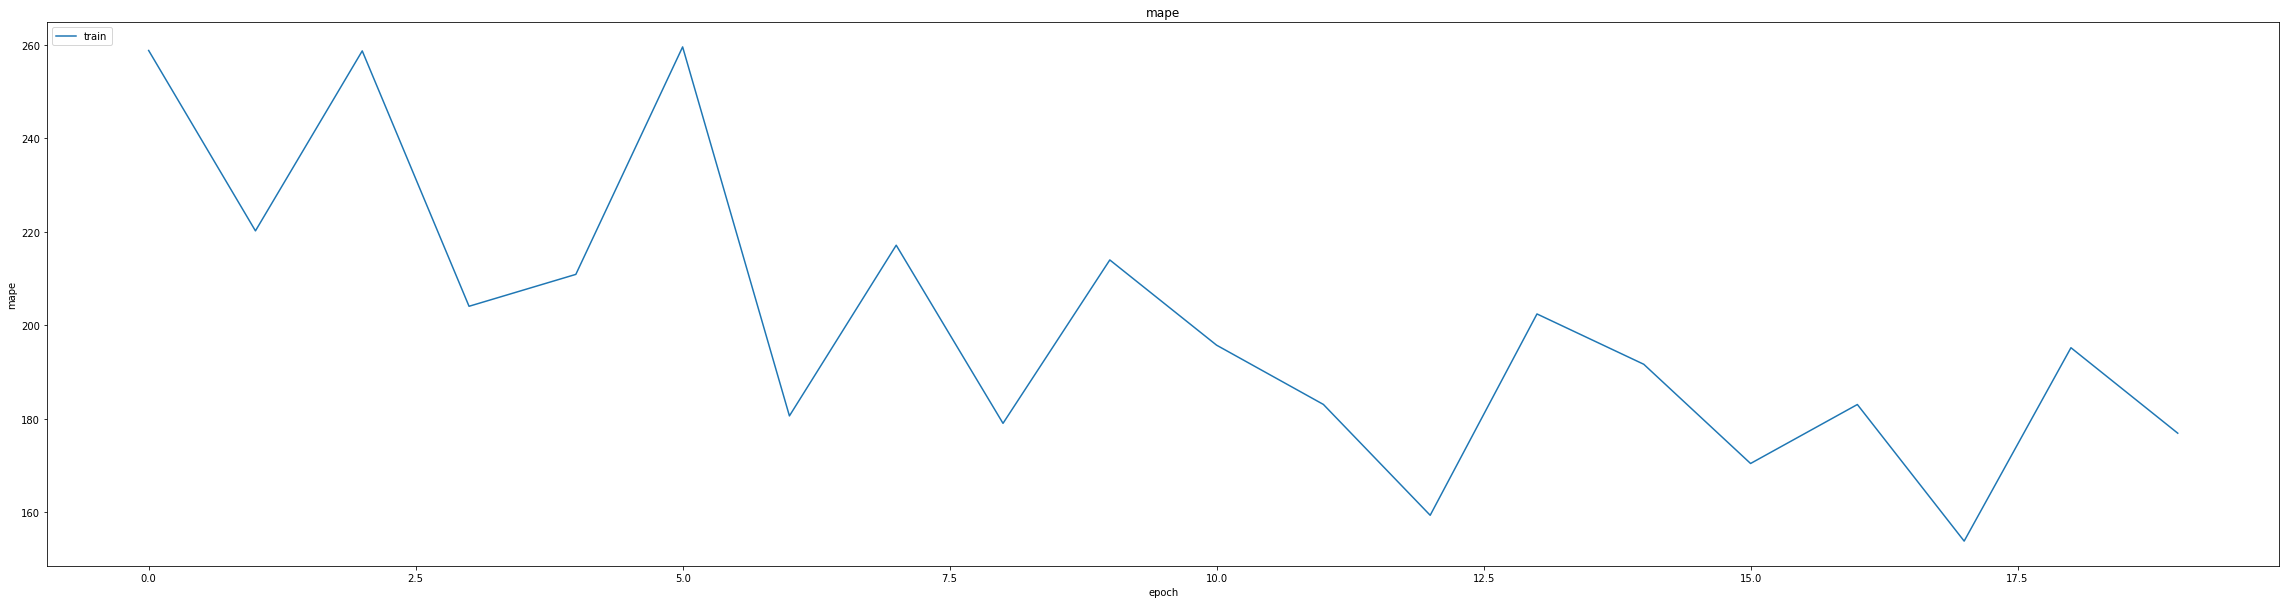

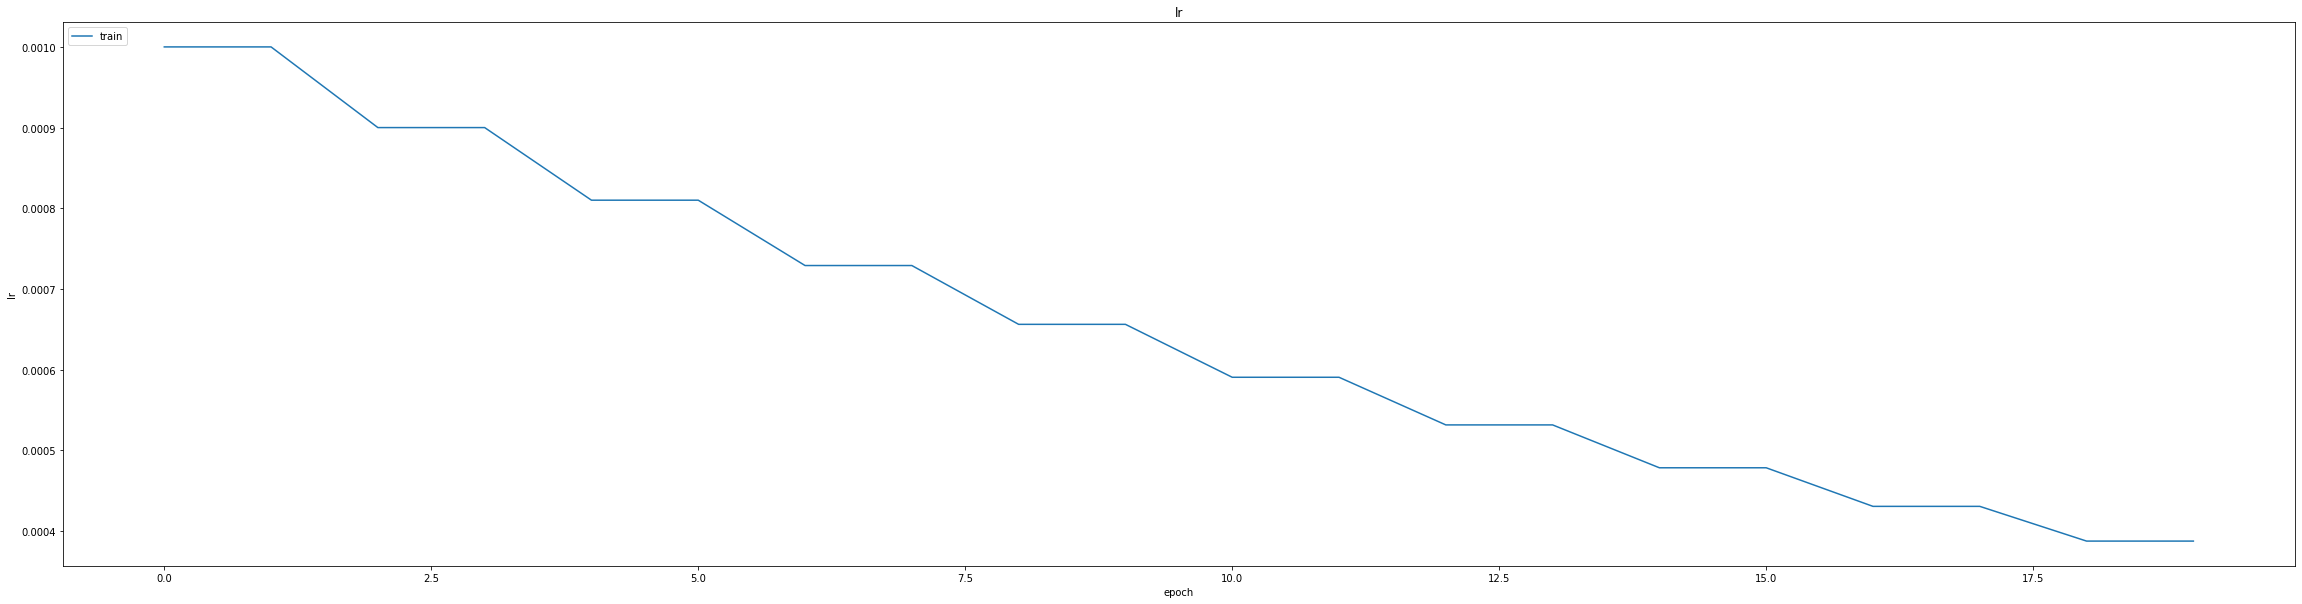

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013980446383357048
0.01631878688931465
687/687 [==============================] - 28s 38ms/step
0.9811428845441299


687/687 [==============================] - 26s 37ms/step


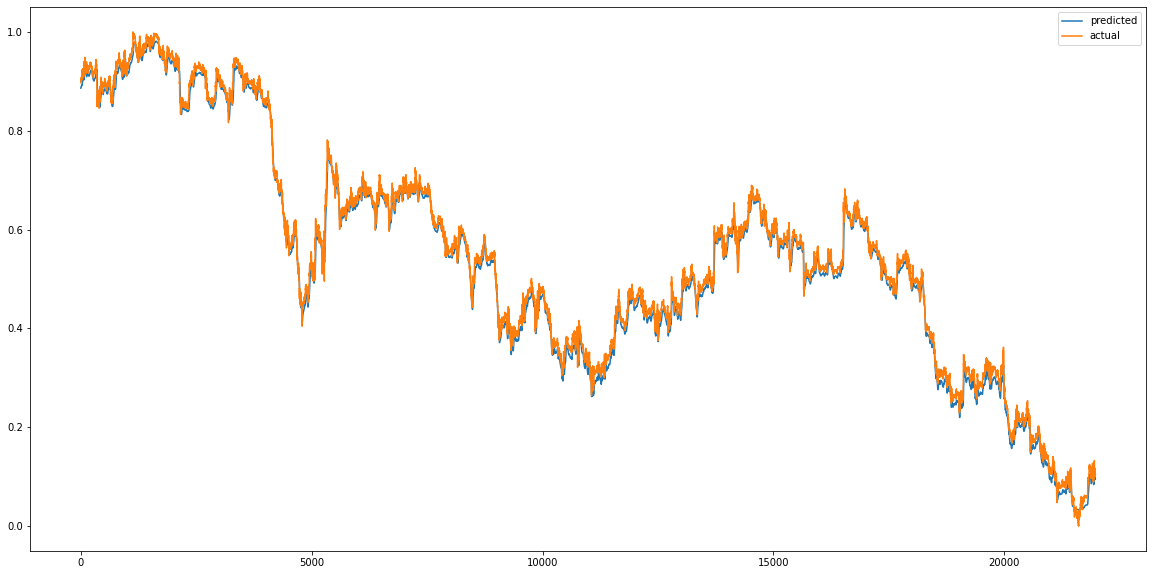

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD5_LSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


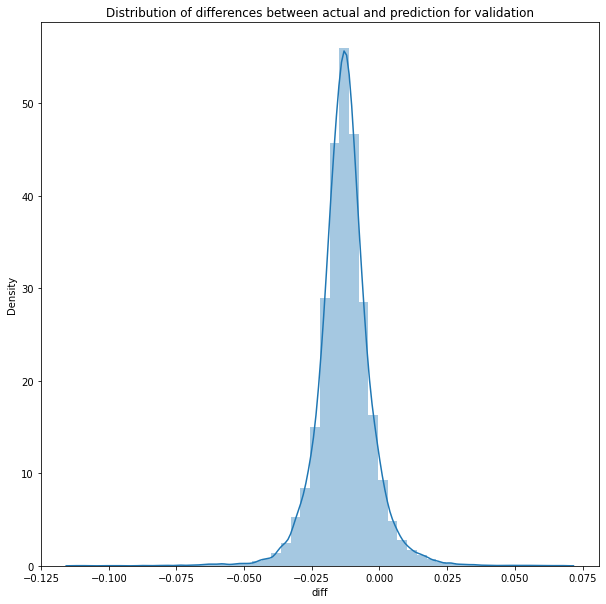

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 27s 38ms/step


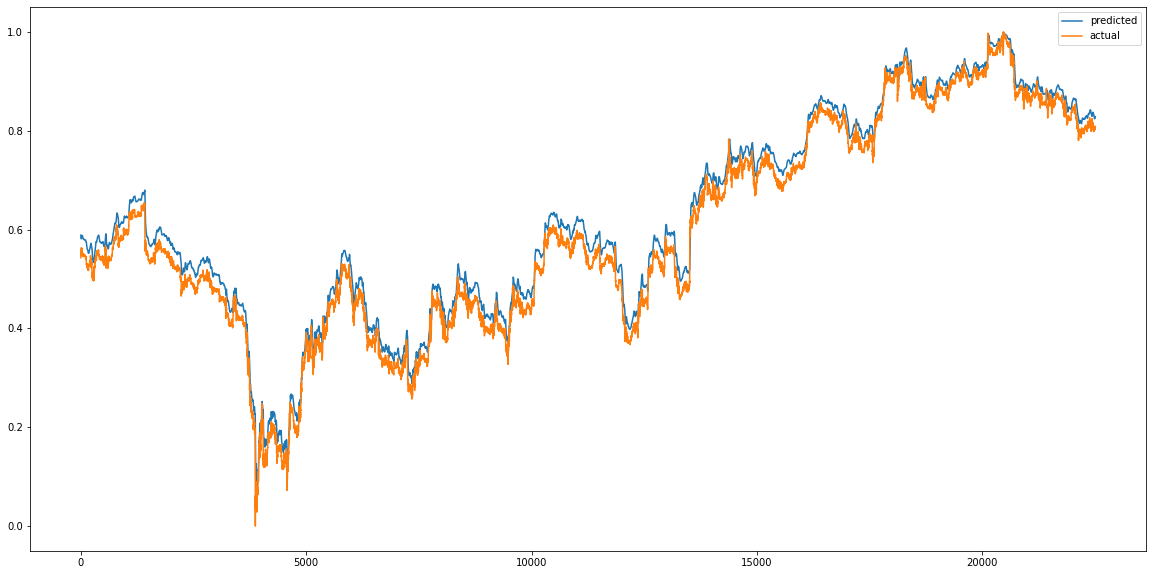

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


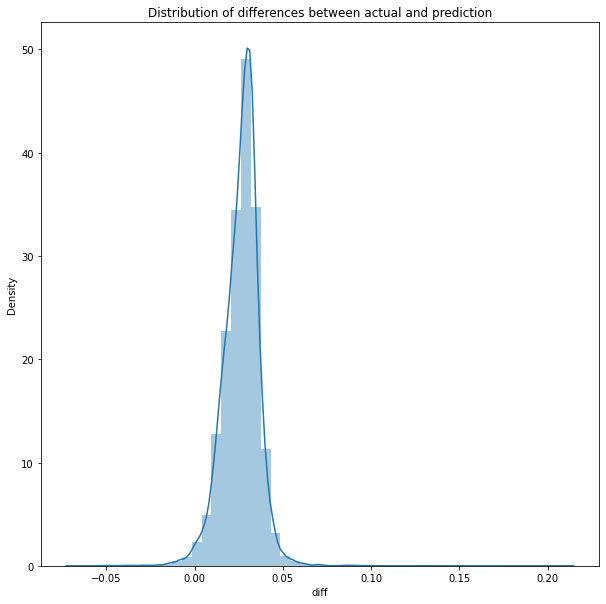

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0007987116432540647
MAE :  0.02657888326790599
RMSE  : 0.028261486925745163
704/704 [==============================] - 27s 38ms/step
R2_Score  : 0.982067395205925


count    22508.000000
mean         0.026360
std          0.010193
min         -0.068642
25%          0.020707
50%          0.027569
75%          0.032528
max          0.210458
Name: diff, dtype: float64